# ***ᴅᴀᴛᴀ ꜱᴄɪᴇɴᴄᴇ ᴊᴏʙꜱ***

# **ᴅᴀᴛᴀ ᴘɪᴘᴇʟɪɴᴇ**

### *ᴀɴᴀʟʏᴛɪᴄᴀʟ ᴘʟᴀᴛꜰᴏʀᴍ*
### *ᴅᴀᴛᴀ ɪɴɢᴇꜱᴛɪᴏɴ*
### *ᴀɴᴀʟʏᴢᴇ ᴍɪꜱꜱɪɴɢ ᴠᴀʟᴜᴇꜱ*
### *ᴀɴᴀʟʏᴢᴇ ᴜɴɪQᴜᴇ ᴠᴀʟᴜᴇꜱ*
### *ᴄᴀᴛᴇɢᴏʀɪᴢᴇ ᴄᴏʟᴜᴍɴꜱ*
### *ᴇxᴘʟᴏʀᴀᴛᴏʀʏ ᴅᴀᴛᴀ ᴀɴᴀʟʏꜱɪꜱ (ᴇᴅᴀ)*
### *ꜰᴇᴀᴛᴜʀᴇ ᴇɴɢɪɴᴇᴇʀɪɴɢ*

## **ᴀɴᴀʟʏᴛɪᴄᴀʟ ᴘʟᴀᴛꜰᴏʀᴍ**

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **ᴅᴀᴛᴀ ɪɴɢᴇꜱᴛɪᴏɴ**

In [97]:
df = pd.read_csv('D:/𝐏𝐘𝐓𝐇𝐎𝐍 𝟐/𝟐𝟎𝟐𝟔/𝐉𝐚𝐧𝐮𝐚𝐫𝐲/𝐃𝐚𝐭𝐚 𝐒𝐜𝐢𝐞𝐧𝐜𝐞 𝐉𝐨𝐛𝐬/Data_Science_jobs.csv')
display(df.head())

,title,company,location,salary,job_type,posted_date,source
0,Data Analyst,Felix,Uruguay,competitive salary with stock options and bonuses,full_time,2025-11-17 18:51:20,Remotive
1,Senior People Analytics Analyst,Delinea,USA,competitive salary with bonus and benefits,full_time,2025-11-17 18:51:20,Remotive
2,Data Scientist,Felix,Argentina,competitive salary with stock options and bonuses,full_time,2025-11-17 18:51:20,Remotive
3,Senior Business Analyst,Archer Education,USA,"75,000 - 90,000 k / per year",full_time,2025-11-17 18:51:19,Remotive
4,Project Research & Due Diligence,Binance,Singapore,competitive salary and company benefits,full_time,2025-11-16 16:51:01,Remotive


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        42 non-null     object
 1   company      42 non-null     object
 2   location     42 non-null     object
 3   salary       38 non-null     object
 4   job_type     33 non-null     object
 5   posted_date  42 non-null     object
 6   source       42 non-null     object
dtypes: object(7)
memory usage: 2.4+ KB


## **ᴀɴᴀʟʏᴢᴇ ᴍɪꜱꜱɪɴɢ ᴠᴀʟᴜᴇꜱ**

In [109]:
Missing_Values_Count = df.isnull().sum()
Missing_Values_Percent = (df.isnull().sum() / len(df)) * 100

Missing_Values = pd.DataFrame({
    'Missing Count': Missing_Values_Count,
    'Missing Percentage': Missing_Values_Percent
})

print(Missing_Values)

             Missing Count  Missing Percentage
title                    0            0.000000
company                  0            0.000000
location                 0            0.000000
salary                   4            9.523810
job_type                 9           21.428571
posted_date              0            0.000000
source                   0            0.000000


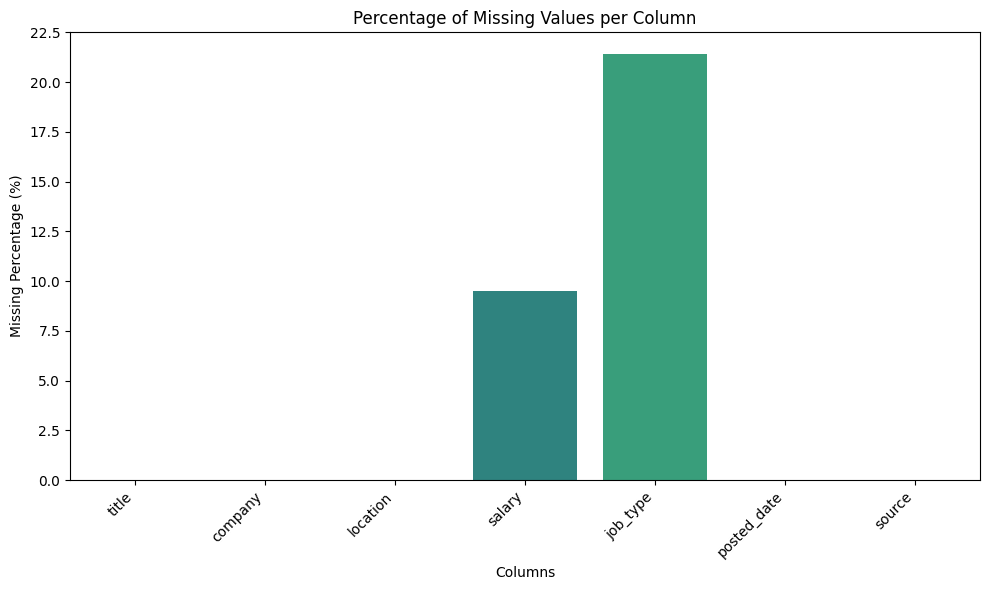

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_values_df.index,
    y=missing_values_df['Missing Percentage'],
    hue=missing_values_df.index,   
    palette='viridis',
    legend=False                   
)

plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **ᴀɴᴀʟʏᴢᴇ ᴜɴɪQᴜᴇ ᴠᴀʟᴜᴇꜱ**

In [107]:
Unique_Counts = df.nunique()
print("Number of unique values per column:")
print(Unique_Counts)

Number of unique values per column:
title          37
company        39
location       26
salary         21
job_type        8
posted_date    33
source          3
dtype: int64


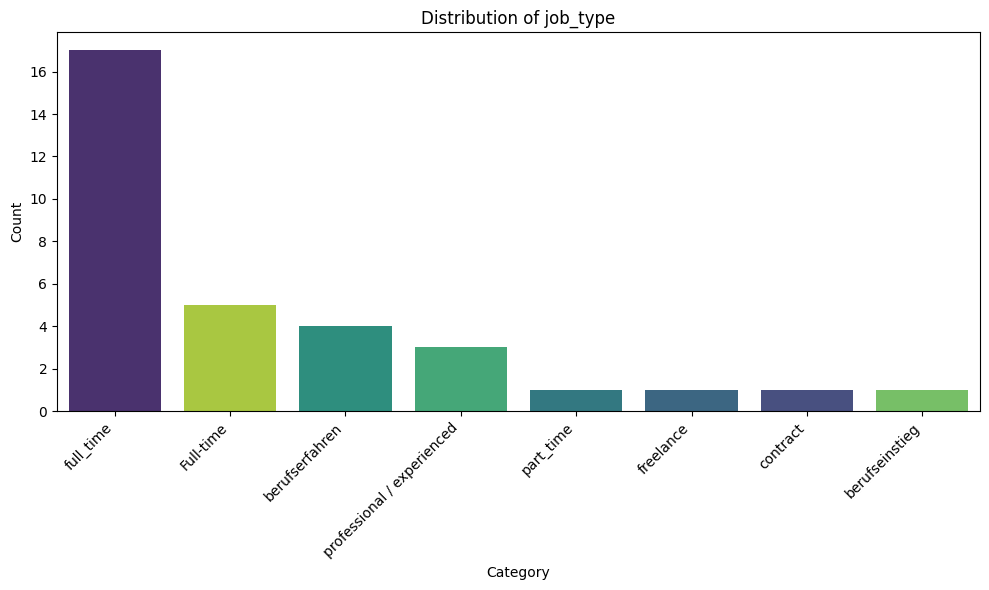

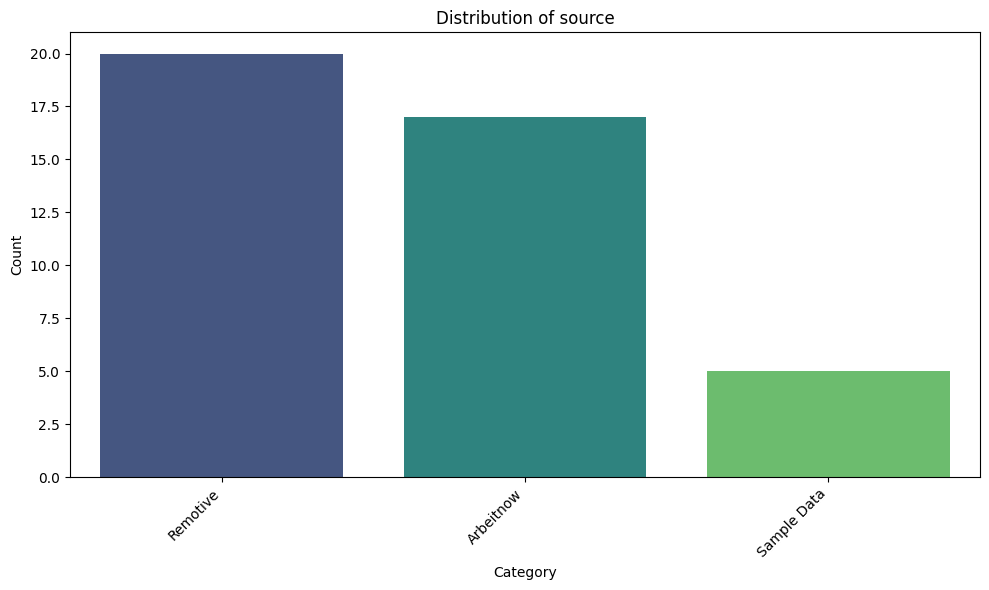

In [108]:
for column in df.columns:
    if df[column].dtype == 'object' and df[column].nunique() < 20:
        plt.figure(figsize=(10, 6))
        sns.countplot(
            data=df,
            x=column,
            hue=column,                    
            palette='viridis',
            order=df[column].value_counts().index,
            legend=False                   
        )
        plt.title(f'Distribution of {column}')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## **ᴄᴀᴛᴇɢᴏʀɪᴢᴇ ᴄᴏʟᴜᴍɴꜱ**

In [106]:
Numerical_Cols = []
Categorical_Cols = []
Datetime_Cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        Numerical_Cols.append(column)
    elif pd.api.types.is_datetime64_any_dtype(df[column]):
        Datetime_Cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        Categorical_Cols.append(column)

print("Numerical Columns:", Numerical_Cols)
print("Categorical Columns:", Categorical_Cols)
print("Datetime Columns:", Datetime_Cols)

Numerical Columns: []
Categorical Columns: ['title', 'company', 'location', 'salary', 'job_type', 'posted_date', 'source']
Datetime Columns: []


## **ᴇxᴘʟᴏʀᴀᴛᴏʀʏ ᴅᴀᴛᴀ ᴀɴᴀʟʏꜱɪꜱ (ᴇᴅᴀ)**

In [104]:
Categorical_Columns_To_Analyze = ['title', 'company', 'location', 'salary', 'job_type', 'source']

for col in Categorical_Columns_To_Analyze:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'title':
title
Area Manager Retail (all Genders) Fashion Brand Hessen/RP/Saarland    3
Data Scientist                                                        2
Senior Business Analyst                                               2
Data Analyst                                                          2
Senior People Analytics Analyst                                       1
Project Research & Due Diligence                                      1
Business Support Executive - Data Visualisation & Dashboard           1
Data Scientist 1                                                      1
Oracle Business Systems Analyst                                       1
Senior Data Specialist                                                1
Data Architect                                                        1
Business Analyst                                                      1
Data Scientist Junior                                                 1
Operations Analyst             

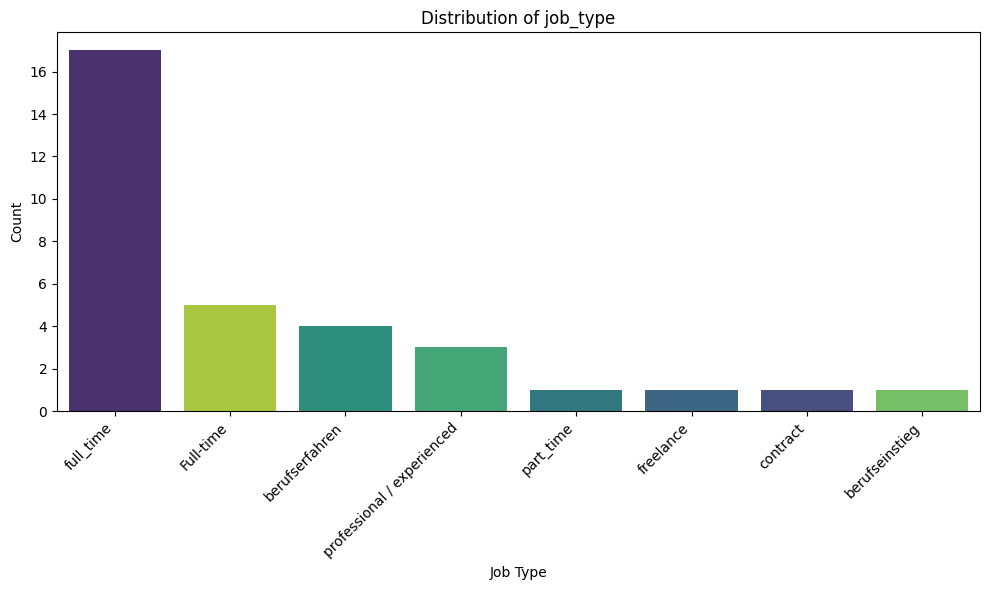

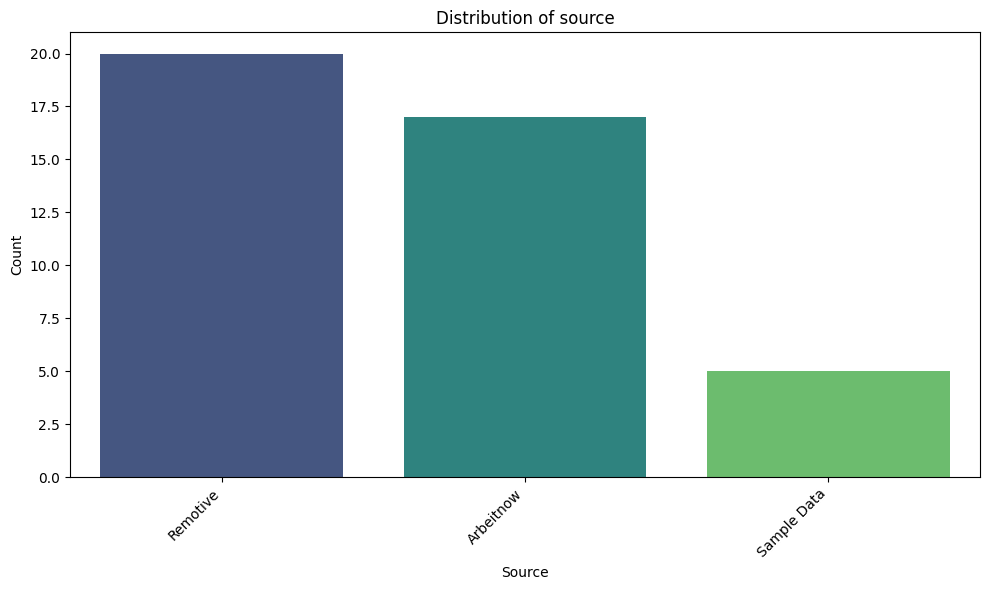

In [105]:
Categorical_Cols_To_Plot = ['job_type', 'source']

for col in Categorical_Cols_To_Plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=col, palette='viridis', order=df[col].value_counts().index, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [86]:
print("Descriptive statistics for 'posted_date':")
print(df['posted_date'].describe())

Descriptive statistics for 'posted_date':
count             42
unique            33
top       2025-11-19
freq               5
Name: posted_date, dtype: object


## **ꜰᴇᴀᴛᴜʀᴇ ᴇɴɢɪɴᴇᴇʀɪɴɢ**

In [87]:
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

In [88]:
df['posted_year'] = df['posted_date'].dt.year
df['posted_month'] = df['posted_date'].dt.month
df['posted_day_of_week'] = df['posted_date'].dt.day_name()

print("Extracted 'posted_year', 'posted_month', and 'posted_day_of_week' from 'posted_date'.")
print(df[['posted_date', 'posted_year', 'posted_month', 'posted_day_of_week']].head())

Extracted 'posted_year', 'posted_month', and 'posted_day_of_week' from 'posted_date'.
          posted_date  posted_year  posted_month posted_day_of_week
0 2025-11-17 18:51:20       2025.0          11.0             Monday
1 2025-11-17 18:51:20       2025.0          11.0             Monday
2 2025-11-17 18:51:20       2025.0          11.0             Monday
3 2025-11-17 18:51:19       2025.0          11.0             Monday
4 2025-11-16 16:51:01       2025.0          11.0             Sunday


In [89]:
print(df['posted_date'].dtype)

datetime64[ns]


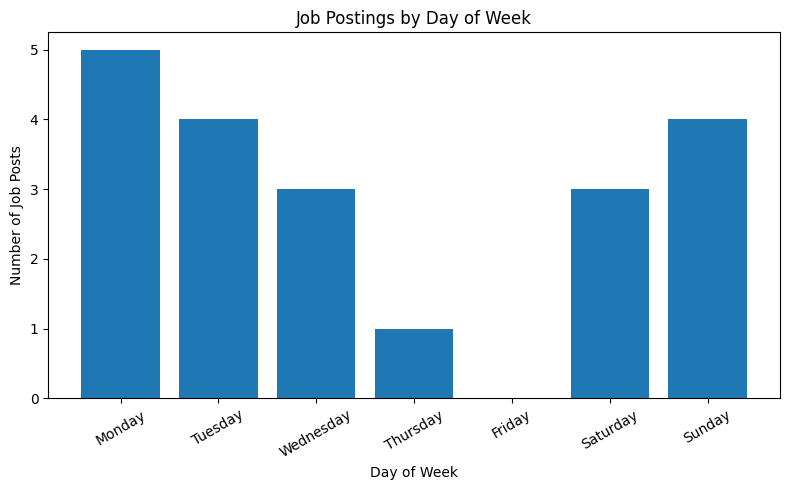

In [94]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Dow_Counts = df['posted_day_of_week'].value_counts().reindex(order)

plt.figure(figsize=(8, 5))
plt.bar(Dow_Counts.index, Dow_Counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Job Posts')
plt.title('Job Postings by Day of Week')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()